# Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from scipy.io import loadmat
from scipy.ndimage import maximum_filter
import scipy.io
import os
import time
import h5py  # Import h5py for reading MATLAB v7.3 files
from IPython.display import clear_output
from scipy.io import savemat

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

# Definitions for calculate the vortex core

In [2]:
# Inicial definitions
ti = 1
flowend = 5400 #5400
pastaOut = '/home/felipe/OLIVER-POSTPROCESS/caseD'
Tin = np.arange(ti, flowend, 1)
step = 0
D = 6.11
L = 2 * D
Re = 734
Ma = 0.5
x1 = Re / 1.72**2
x2 = x1 + L
nu = 1 / Re

# Load mesh
mesh = scipy.io.loadmat('/home/felipe/autolst/m05-FINAL/mesh.mat')

x = np.array(mesh['X'][0],dtype=np.float64)
y = np.array(mesh['Y'][0],dtype=np.float64)
z = np.array(mesh['Z'][0],dtype=np.float64)

x1 = 200
x2 = 500
y1 = -6.1
y2 = 20
z1 = -20
z2 = 20

# Set display interval
x_start = np.abs(x - (x1-2*L)).argmin()
x_end = np.abs(x - (x2)).argmin()
y_start = np.abs(y -y1).argmin()
y_end = np.abs(y - y2).argmin()
z_start = np.abs(z - z1).argmin()
z_end = np.abs(z - z2).argmin()

x_factor = 1
y_factor = 1
z_factor = 1

x = x[::x_factor]
y = y[::y_factor]
z = z[::z_factor]

timer = 0
coresample = None
var = {}

# Find the core sample and creating the final coresample

In [3]:

for block in range(1,4):
    # creating the blocks
    if block == 1:
        time_block = [1010, 1041, 1073]
        iv = 419
        jv = np.arange(66, 78)
        kv = np.arange(18, 30)
    elif block == 2:
        time_block = [1010, 1040, 1072]
        iv = 419
        jv = np.arange(66, 78)
        kv = np.arange(133, 145)
    elif block == 3:
        time_block = [1010, 1040, 1072]
        iv = 419
        jv = np.arange(66, 78)
        kv = np.arange(83, 95)
    elif block == 4:
        time_block = [1010]
        iv = 419
        jv = np.arange(66, 78)
        kv = np.arange(18, 30)


    for tt in range(len(time_block)):
        if time_block[tt] < 11500:
            tstr = f'/jahu/Felipe/demoiselle/felipe/felipe/autolst/m05-FINAL/flow_{time_block[tt]:010d}.mat'
            if not os.path.exists(tstr):
                continue
        else:
            tstr = f'/home/felipe/autolst/m05-FINAL/flow_{time_block[tt]:010d}.mat'
            if not os.path.exists(tstr):
                continue
        clear_output(wait=True)  
        print(f'block: {block}')       
        print(f'flow: {time_block[tt]}')
        print('load')

        # Use h5py to load the MATLAB file
        with h5py.File(tstr, 'r') as file:
            l2 = np.array(file['L2']).transpose((2,1,0))[::x_factor,::y_factor,::z_factor]

        nx, ny, nz = l2.shape

        vortex = np.zeros((len(kv), len(jv)))
        vortexf1 = np.zeros_like(vortex)
        vortexf2 = np.zeros_like(vortex)
        coresample = np.zeros_like(vortex)

        l2[np.isnan(l2)] = 0

        for jj in range(len(jv)):
            for kk in range(len(kv)):
                vortex[kk, jj] = l2[iv, jv[jj], kv[kk]]

        vortexf1[:len(kv) // 2, :] = vortex[:len(kv) // 2, :]
        vortexf1[len(kv) // 2:, :] = np.flip(vortex[:len(kv) // 2, :], axis=0)

        vortexf2[:len(kv) // 2, :] = np.flip(vortex[len(kv) // 2:, :], axis=0)
        vortexf2[len(kv) // 2:, :] = vortex[len(kv) // 2:, :]

        coresample += (vortexf1 + vortexf2)
        timer += 1

coresample /= (2 * timer)

#var['coresample'] = coresample
print('finish')

block: 3
flow: 1072
load
finish


# Comparing the core Sample and convolving for find the vortex core

In [4]:
# Convolution for z0 - 1/z_size zf + 1/z_size
vortexV = coresample.flatten()
possiblevortex = np.zeros((len(kv), len(jv)))

correlt = np.zeros((len(Tin), len(z)))

# mainly core
iv = 419
jv = np.arange(66, 78)
var['y'] = y[jv]
sizeSample = len(kv)

# Start timer
totalTimer = time.time()

for tt in range(len(Tin)):
    clear_output(wait=True) 
    os.system('cls' if os.name == 'nt' else 'clear')  # Clean the terminal
    loopTimer = time.time()
    print('progress:')
    print(((Tin[tt] - Tin[0]) / (Tin[-1] - Tin[0])) * 100)

    if tt > 0:
        totalElapsedTime = (time.time() - totalTimer) / 60
        estimatedRemainingTime = (totalElapsedTime / tt) * (len(Tin) - tt)
        print(f'Last loop time: {elapsedTime:.2f} sec')
        print(f'Total time: {totalElapsedTime:.2f} min')
        print(f'Remaining time: {estimatedRemainingTime:.2f} min')

    if Tin[tt] < 11500:
        tstr = f'/jahu/Felipe/demoiselle/felipe/felipe/autolst/m05-FINAL/flow_{Tin[tt]:010d}.mat'
        if not os.path.exists(tstr):
            continue
    else:
        tstr = f'/home/felipe/autolst/m05-FINAL/flow_{Tin[tt]:010d}.mat'
        if not os.path.exists(tstr):
            continue               
    print(f'flow: {Tin[tt]}')
    print('load')

    # Use h5py to load the MATLAB file
    with h5py.File(tstr, 'r') as file:
        l2 = np.array(file['L2']).transpose((2,1,0))[::x_factor,::y_factor,::z_factor]

    nx, ny, nz = l2.shape
    l2[np.isnan(l2)] = 0
    predata = l2[iv, jv, :]

    data = np.hstack((predata, predata[:, :sizeSample]))

    for zz in range(len(z)):
        possiblevortex = data[:, zz:(zz + sizeSample)].T
        possiblevortexV = possiblevortex.flatten()
        correlt[tt, zz] = np.convolve(vortexV, possiblevortexV, mode='valid')

    elapsedTime = time.time() - loopTimer

var['cor'] = correlt
var['z'] = z
var['Tin'] = Tin

print(type(coresample), type(correlt), type(z), type(Tin))

# Save the data using h5py in MATLAB version 7.3 format
#with h5py.File('/home/felipe/files/testLvortex.mat', 'w', libver='latest') as f:
#    for key, value in var.items():
#        # Ensure value is a NumPy array with a compatible dtype
#        if isinstance(value, np.ndarray):
#            f.create_dataset(key, data=value)
#        else:
#            # Convert to a compatible type if necessary
#            f.create_dataset(key, data=np.array(value, dtype='float64'))  # or appropriate dtype
            
var = {
    'coresample': coresample,
    'correlt': correlt,
    'z': z,
    'Tin': Tin
}            
savemat('/home/felipe/files/LvortexFULL.mat', var, do_compression=True)
            
totalElapsedTime = time.time() - totalTimer
print(f'total time for the loop: {totalElapsedTime:.2f} sec')

progress:
100.0
Last loop time: 0.78 sec
Total time: 79.81 min
Remaining time: 0.01 min
flow: 5399
load
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
total time for the loop: 4789.78 sec


# Load this plots
Need to change to run in cluster

In [4]:
# Load file .mat 
#data = loadmat('/home/felipe/files/testLvortex1_5000_mean.mat')
data = loadmat('/home/felipe/files/LvortexFULL.mat')
correlation = data['correlt']
z = data['z'].flatten()  # load using a 1D vector
t = data['Tin'].flatten()  # load using a 1D vector
# Changing zero and negative values to zero
correlation = np.where(correlation <= 0, 10e-10, correlation)


# Contor Plot Convulation

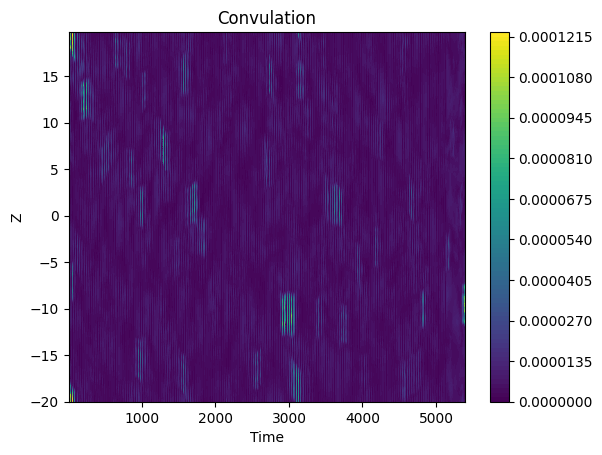

In [5]:
# Transpose correlt so that the dimensions are compatible
correlt = correlation.T

# Create the contour graph
plt.figure()
correlt_clipped = np.clip(correlt, 10e-6, 10e-4)
norm = mcolors.LogNorm(vmin=10**-6, vmax=10**-4)

# Contour plot
contour = plt.contourf(t, z, correlt, levels=100, cmap='viridis') # , norm=norm

# add colorbar
cbar = plt.colorbar(contour)

# Deffining thicks and labels
#cbar.set_ticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
#cbar.set_ticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$'])

plt.xlabel('Time')
plt.ylabel('Z')
plt.title('Convulation')
plt.show()

# Finding Local Max

In [6]:
# Find Local maximun using a box 30x60
def islocalmax2(data):
    # filtering by the maximun inside this box
    local_max = maximum_filter(data, size=(30, 60))
    
    # check if the maximum
    return (data == local_max) & (local_max == data)


Maxs = islocalmax2(correlt)
Maxs[correlt < 0.00001] = 0

# Grid to T and Z
T, Z = np.meshgrid(t, z)
maxval = correlt[Maxs.astype(bool)]

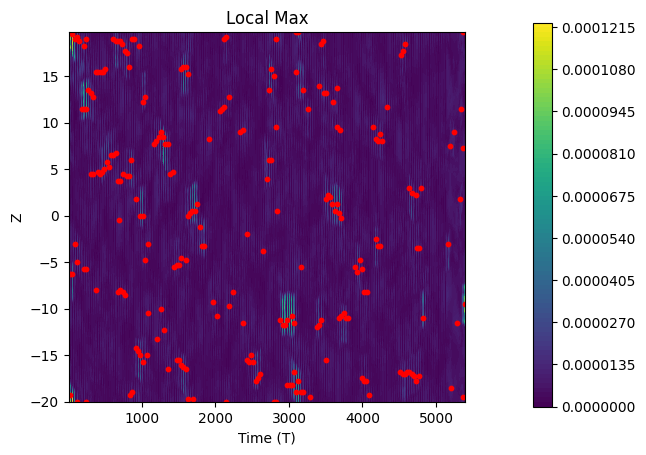

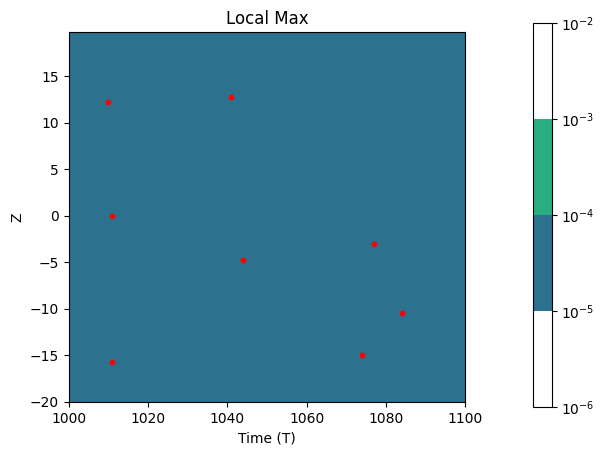

In [10]:
# Creat contour plot
plt.figure()
#correlt_clipped = np.clip(correlt, 10e-6, 10e-2)
#norm = mcolors.LogNorm(vmin=10**-6, vmax=10**-2)
contour = plt.contourf(t, z, correlt, levels=100, cmap='viridis') #, norm=norm
cbar = plt.colorbar(contour)
#cbar.set_ticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2])
#cbar.set_ticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$'])
plt.xlabel('Time')
plt.ylabel('Z')
plt.title('Convulation')

# Plot Max
plt.scatter(T[Maxs.astype(bool)], Z[Maxs.astype(bool)], color='red', s=10)
# Changing colobar position         
cbar.ax.set_position([0.85, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
plt.xlabel('Time (T)')
plt.ylabel('Z')
plt.title('Local Max')
plt.show()

# Creat contour plot but small domain
plt.figure()
#correlt_clipped = np.clip(correlt, 10e-6, 10e-2)
norm = mcolors.LogNorm(vmin=10**-6, vmax=10**-2)
contour = plt.contourf(t, z, correlt_clipped, levels=100, cmap='viridis', norm=norm) #, norm=norm
cbar = plt.colorbar(contour)
cbar.set_ticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2])
cbar.set_ticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$'])
plt.scatter(T[Maxs.astype(bool)], Z[Maxs.astype(bool)], color='red', s=10)
cbar.ax.set_position([0.85, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
plt.xlabel('Time (T)')
plt.xlim(1000, 1100)
plt.ylabel('Z')
plt.title('Local Max')
plt.show()


# Flow vortex extraction

In [8]:
# if not run all again:
vortexV = coresample.flatten()
possiblevortex = np.zeros((len(kv), len(jv)))

correlt = np.zeros((len(Tin), len(z)))

# mainly core
iv = 419
jv = np.arange(66, 78)
var['y'] = y[jv]
sizeSample = len(kv)

In [16]:
Yvortex = np.arange(50, 80)
Xvortex = np.arange(362, 425) # 279.83596862 to 291.745417
Zvortexsize = 3*sizeSample
# Inicializa listas para armazenar os blocos e as posições
Vortexblocs = np.zeros((2,244,63,30,60))
cont1 = 0
Zblock = np.zeros((244,60))
Tblock = np.zeros(244)

# Start timer
totalTimer = time.time()

for tt in range(len(Tin)):
    clear_output(wait=True) 
    os.system('cls' if os.name == 'nt' else 'clear')  # Clean the terminal
    loopTimer = time.time()
    print('progress:')
    print(((Tin[tt] - Tin[0]) / (Tin[-1] - Tin[0])) * 100)

    if tt > 0:
        totalElapsedTime = (time.time() - totalTimer) / 60
        estimatedRemainingTime = (totalElapsedTime / tt) * (len(Tin) - tt)
        print(f'Last loop time: {elapsedTime:.2f} sec')
        print(f'Total time: {totalElapsedTime:.2f} min')
        print(f'Remaining time: {estimatedRemainingTime:.2f} min')

    if Tin[tt] < 11500:
        tstr = f'/jahu/Felipe/demoiselle/felipe/felipe/autolst/m05-FINAL/flow_{Tin[tt]:010d}.mat'
        if not os.path.exists(tstr):
            continue
    else:
        tstr = f'/home/felipe/autolst/m05-FINAL/flow_{Tin[tt]:010d}.mat'
        if not os.path.exists(tstr):
            continue               
    print(f'flow: {Tin[tt]}')
    print('load')
    
    
    

#aqui pra baixo  ta errado

    # Itera sobre os índices onde Maxs é 1
    for z_index in range(len(z)):
        if Maxs[z_index, tt]:  # Verifica se é um máximo local
            
            # Use h5py to load the MATLAB file
            with h5py.File(tstr, 'r') as file:
                l2 = np.array(file['L2']).transpose((2,1,0))[::x_factor,::y_factor,::z_factor]
                u = np.array(file['U']).transpose((2,1,0))[::x_factor,::y_factor,::z_factor]
            nx, ny, nz = l2.shape
            
            l2[np.isnan(l2)] = 0
            u[np.isnan(u)] = 0
            
            l2 = np.concatenate((l2, l2[:, :, :60]), axis=2)
            u = np.concatenate((u, u[:, :, :60]), axis=2)
            Z = np.concatenate((z, z[:60]), axis=0)         
            
            # Extrai o bloco de l2 para as coordenadas especificadas
            blockl2 = l2[Xvortex[0]:Xvortex[-1]+1, Yvortex[0]:Yvortex[-1]+1, z_index:z_index+60]
            blocku = u[Xvortex[0]:Xvortex[-1]+1, Yvortex[0]:Yvortex[-1]+1, z_index:z_index+60]
            
            # Armazena o bloco
            Vortexblocs[1,cont1,:,:,:] = blockl2  # Adiciona o bloco à lista
            Vortexblocs[2,cont1,:,:,:] = blocku
        
            # Armazena as posições correspondentes de Z e T
            Zblock[cont1] = Z[z_index:z_index+60]
            Tblock[cont1] = t[tt]
            cont1 += 1
    elapsedTime = time.time() - loopTimer

varsave  = {}
varsave['Vortexblocs'] = Vortexblocs
varsave['Zblock'] = Zblock
varsave['Tblock'] = Tblock
savemat('/home/felipe/files/LvortexExtract.mat', var, do_compression=True)

progress:
0.444609114486847
Last loop time: 0.00 sec
Total time: 0.00 min
Remaining time: 0.36 min
flow: 25
load


IndexError: index 2 is out of bounds for axis 0 with size 2

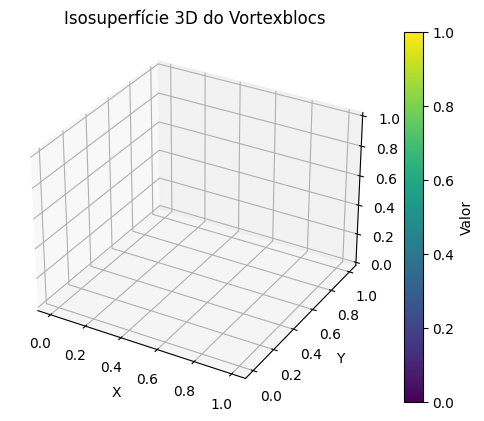

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supondo que Vortexblocs seja um array 4D com dimensões (244, 63, 30, 60)
# Selecionando o índice 
BLOCKCONT = 1

# Seleciona os dados do índice BLOCKCONT
data = Vortexblocs[BLOCKCONT, :, :, :]

# Criando as coordenadas (x, y, z)
x1 = np.arange(data.shape[0])  # Ou use Xvortex se disponível
y1 = np.arange(data.shape[1])  # Ou use Yvortex se disponível
z1 = np.arange(data.shape[2])  # Ou use Zblock se disponível
x1, y1, z1 = np.meshgrid(x1, y1, z1, indexing='ij')  # Grade 3D

# Achando os pontos da isosuperfície
isovalue = 0.001  # Ajuste conforme necessário
mask = np.abs(data - isovalue) < 0.0001  # Máscara para valores próximos do isovalor

# Extraindo os pontos (x, y, z) e os valores
x_iso = x1[mask]
y_iso = y1[mask]
z_iso = z1[mask]
values_iso = data[mask]

# Criando a figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos da isosuperfície
sc = ax.scatter(x_iso, y_iso, z_iso, c=values_iso, cmap='viridis', s=1)

# Adicionando uma barra de cores
fig.colorbar(sc, ax=ax, label='Valor')

# Definindo rótulos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Isosuperfície 3D do Vortexblocs')

plt.show()

In [12]:
import numpy as np
import pyvista as pv

# Supondo que Vortexblocs seja um array 4D com dimensões (244, 63, 30, 60)
# Selecionando o índice 
BLOCKCONT = 1

# Seleciona os dados do índice BLOCKCONT
data = Vortexblocs[BLOCKCONT, :, :, :]

# Criando as coordenadas (x, y, z)
x1 = np.arange(data.shape[0])  # Ou use Xvortex se disponível
y1 = np.arange(data.shape[1])  # Ou use Yvortex se disponível
z1 = np.arange(data.shape[2])  # Ou use Zblock se disponível
x1, y1, z1 = np.meshgrid(x1, y1, z1, indexing='ij')  # Grade 3D

# Convertendo as coordenadas para um formato plano
x_flat = x1.ravel()
y_flat = y1.ravel()
z_flat = z1.ravel()
values_flat = data.ravel()

# Criando uma malha estruturada com pyvista
grid = pv.StructuredGrid()
grid.points = np.c_[x_flat, y_flat, z_flat]
grid.dimensions = data.shape
grid["Values"] = values_flat  # Adicionando os valores como campo escalar

# Salvando o arquivo em formato VTK
output_filename = "vortexblocs.vtk"
grid.save(output_filename)

print(f"Os dados foram salvos no arquivo '{output_filename}'.")

Os dados foram salvos no arquivo 'vortexblocs.vtk'.
